# Imports

In [1]:
import numpy as np
from Ising_Model_Fast import *

# Simulation

## Configuration

In [2]:
SEED = 42
np.random.seed(SEED)

N = 50
J1 = 0.5
J2 = 1.0
T = 0.5
MC_steps = 1000000

## Initialize net

In [3]:
# Generate a random 2D lattice

# Probability of value 1 [-1 has (p-1) probability]
p_1 = 0.5
lattice = np.random.choice([1, -1], size=(N, N), p=[p_1, 1-p_1])

In [4]:
# Get initial energy of the lattice
energy = get_energy(lattice, N, J1, J2)

# Desired number of states to save
n_images = 50

# Generate the appropriate spacing for the images
# Using logspace to get more images at the early stages (more change) and less at the end (less change)
img_spacing = set(np.logspace(0, np.log10(MC_steps), num=n_images, endpoint=True, dtype=int))

In [5]:
simulation_params = {
    'lattice' : lattice,
    'MC_steps' : MC_steps,
    'T' : T,
    'energy' : energy,
    'N' : N,
    'J1' : J1,
    'J2' : J2,
    'save_images' : True,
    'image_spacing' : img_spacing,
    'verbose' : 0
    }

# Run the Metropolis algorithm
spins, energies, images = metropolis(**simulation_params)

In [7]:
T_0 = 0.01
T_f = np.log10(10.0)
T_steps = 10
temperatures = np.logspace(T_0, T_f, num=T_steps, endpoint=True, dtype=float)
spins_T = np.empty((T_steps, MC_steps), dtype=np.int8)
energies_T = np.empty((T_steps, MC_steps), dtype=np.float32)
images_T = np.empty((T_steps, n_images-2, N, N), dtype=np.int8)

for i, T in enumerate(temperatures):
    print(f"Running T = {T:.2f}...")
    print("-" * 20)
    simulation_params['T'] = T
    spins_T[i], energies_T[i], images_T[i] = metropolis(**simulation_params)


Running T = 1.02...
--------------------
Running T = 1.32...
--------------------
Running T = 1.70...
--------------------
Running T = 2.19...
--------------------
Running T = 2.82...
--------------------
Running T = 3.63...
--------------------
Running T = 4.68...
--------------------
Running T = 6.03...
--------------------
Running T = 7.76...
--------------------
Running T = 10.00...
--------------------


In [8]:
C_T = np.empty(T_steps, dtype=np.float32)
for i in range(T_steps):
    C_T[i] = compute_specific_heat(energies_T[i], N, temperatures[i])

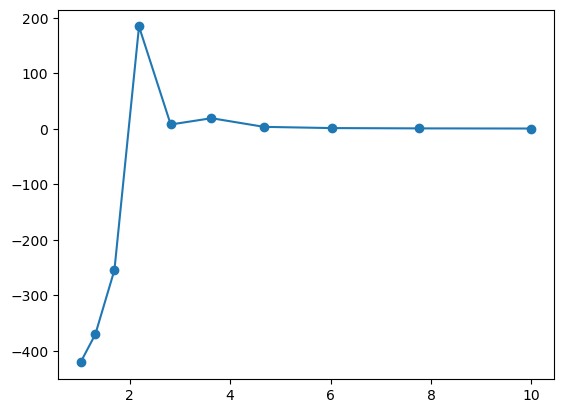

In [9]:
plt.plot(temperatures, C_T, marker='o')